<a href="https://colab.research.google.com/github/BartoszDorobek/thesis/blob/master/notebooks/cnn_baseline_model_from_images_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pathlib import Path

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

DATA_PATH = "drive/MyDrive/musicai/images_original"

SAMPLE_RATE = 22_050
MAX_SIGNAL_LENGTH_TO_CROP = 660_000
N_FFT = 2_048
N_MELS = 128


In [ ]:
from pathlib import Path

from tensorflow.keras.preprocessing import image_dataset_from_directory

def get_dataset(subset):
    return image_dataset_from_directory(
        directory=DATA_PATH,
        labels="inferred",
        label_mode="categorical",
        color_mode="rgb",
        batch_size=32,
        image_size=(288, 432),
        shuffle=True,
        seed=7,
        validation_split=0.2,
        subset=subset,
    )

train_ds = get_dataset(subset="training")
val_ds = get_dataset(subset="validation")


Found 999 files belonging to 10 classes.
Using 800 files for training.
Found 999 files belonging to 10 classes.
Using 199 files for validation.


In [ ]:
train_ds._flat_shapes

[TensorShape([None, 288, 432, 3]), TensorShape([None, 10])]

In [ ]:
from tensorflow.keras.layers import MaxPooling2D, Dropout, Conv2D, Flatten, AveragePooling2D, BatchNormalization, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam


# model = Sequential(
#     [
#         Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(288, 432, 3)),
#         Conv2D(32, (3, 3), activation="relu"),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),
#         Conv2D(64, (3, 3), padding="same", activation="relu"),
#         Conv2D(64, (3, 3), activation="relu"),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),
#         Conv2D(64, (3, 3), padding="same", activation="relu"),
#         Conv2D(64, (3, 3), activation="relu"),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),
#         Flatten(),
#         Dense(512, activation="relu"),
#         Dropout(0.5),
#         Dense(10, activation="softmax"),
#     ]
# )

# model = Sequential([
#     # Input shape is the size of the image 288x432 with 3 bytes color
    
#     Conv2D(16, (3,3), activation='relu', input_shape=(288, 432, 3)),
#     MaxPooling2D(2,2),
#     Dropout(0.2), 

#     Conv2D(32, (3,3), activation='relu'),
#     MaxPooling2D(2,2),
#     Dropout(0.2), 

#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(2,2),
#     Dropout(0.3), 

#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(2,2),
#     Dropout(0.3), 
#     # Flatten the results to feed into a DNN
#     Flatten(),
    
#     # Dense
#     Dense(128, activation="relu"),
#     #BatchNormalization(),
#     Dropout(0.5),
#     Dense(10, activation="softmax"),
# ])

model = Sequential([
    # Input shape is the size of the image 288x432 with 3 bytes color
    
    Conv2D(8, (7,7), activation='relu', input_shape=(288, 432, 3)),
    BatchNormalization(axis=3),
    MaxPooling2D(2,2),

    Conv2D(16, (5,5), activation='relu'),
    BatchNormalization(axis=3),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(axis=3),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(axis=3),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(axis=3),
    MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    Flatten(),
    
    # Dense
    Dense(128, activation="relu"),
    #BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation="softmax"),
])

In [ ]:
epochs = 60 #100
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 282, 426, 8)       1184      
                                                                 
 batch_normalization_70 (Bat  (None, 282, 426, 8)      32        
 chNormalization)                                                
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 141, 213, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 137, 209, 16)      3216      
                                                                 
 batch_normalization_71 (Bat  (None, 137, 209, 16)     64        
 chNormalization)                                                
                                                     

In [ ]:
from tqdm import tqdm
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history =  model.fit(
    x=train_ds,
    validation_data=val_ds,
    epochs=epochs, 
    verbose=2,
    callbacks=[callback]
)

Epoch 1/60
25/25 - 7s - loss: 3.5598 - accuracy: 0.1825 - val_loss: 3.4586 - val_accuracy: 0.0905 - 7s/epoch - 270ms/step
Epoch 2/60
25/25 - 6s - loss: 2.1600 - accuracy: 0.2338 - val_loss: 2.4450 - val_accuracy: 0.1156 - 6s/epoch - 221ms/step
Epoch 3/60
25/25 - 5s - loss: 2.1512 - accuracy: 0.1750 - val_loss: 2.2341 - val_accuracy: 0.2010 - 5s/epoch - 216ms/step
Epoch 4/60
25/25 - 5s - loss: 2.0663 - accuracy: 0.2125 - val_loss: 2.2069 - val_accuracy: 0.1960 - 5s/epoch - 219ms/step
Epoch 5/60
25/25 - 5s - loss: 1.9694 - accuracy: 0.2525 - val_loss: 1.9052 - val_accuracy: 0.3568 - 5s/epoch - 218ms/step
Epoch 6/60
25/25 - 5s - loss: 1.9701 - accuracy: 0.2713 - val_loss: 1.9221 - val_accuracy: 0.3467 - 5s/epoch - 219ms/step
Epoch 7/60
25/25 - 5s - loss: 1.8631 - accuracy: 0.3150 - val_loss: 1.9826 - val_accuracy: 0.3920 - 5s/epoch - 215ms/step
Epoch 8/60
25/25 - 5s - loss: 1.8323 - accuracy: 0.3350 - val_loss: 1.7912 - val_accuracy: 0.3819 - 5s/epoch - 218ms/step
Epoch 9/60
25/25 - 5s - 

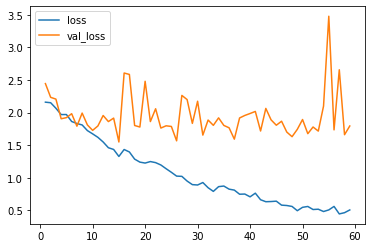

In [ ]:
results_cnn = pd.DataFrame(history.history).iloc[1:, :]
results_cnn.loss.plot(label='loss')
results_cnn.val_loss.plot(label='val_loss')
plt.legend()
plt.show()

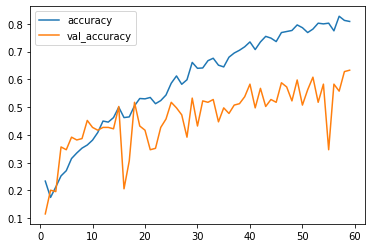

In [ ]:
results_cnn.accuracy.plot(label='accuracy')
results_cnn.val_accuracy.plot(label='val_accuracy')
plt.legend()
plt.show()